Extracting dataset...
Dataset is ready!
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.4750 - loss: 0.6993 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.4964 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.4906 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.4949 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.5179 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.4987 - loss: 0.6942 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.4957 - loss: 0.6947 - val_accuracy: 0.5000 - val_loss: 0.6894
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.5278 - loss: 0.6906 - val_accuracy: 0.5000 - v

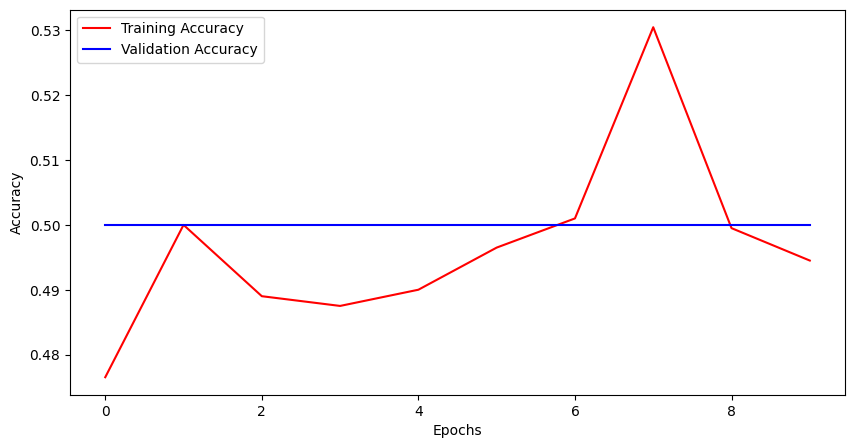

In [4]:
import tensorflow as tf
import os
import zipfile
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

#  Step 1: Define Dataset Path
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_path = os.path.expanduser("~/.keras/datasets/cats_and_dogs_filtered.zip")
extract_path = os.path.expanduser("~/.keras/datasets/cats_and_dogs_filtered")

# Step 2: Download Dataset if Missing
if not os.path.exists(zip_path):
    print("Downloading dataset...")
    zip_path = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", dataset_url)

#  Step 3: Extract Dataset if Not Already Extracted
if not os.path.exists(extract_path):
    print("Extracting dataset...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(os.path.expanduser("~/.keras/datasets/"))

#  Step 4: Verify Extracted Dataset Paths
train_dir = os.path.join(extract_path, "train")
validation_dir = os.path.join(extract_path, "validation")

if not os.path.exists(train_dir) or not os.path.exists(validation_dir):
    raise FileNotFoundError("Dataset extraction failed. Check the dataset path!")

print("Dataset is ready!")

#  Step 5: Data Preprocessing & Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

#  Step 6: Load Data Using ImageDataGenerator
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode="binary"
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=32, class_mode="binary"
)

#  Step 7: Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # Binary Classification (Cat vs Dog)
])

#  Step 8: Compile Model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

#  Step 9: Train Model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  # Adjust for better performance
    verbose=1
)

#  Step 10: Evaluate Model Performance
train_acc = history.history["accuracy"][-1]
val_acc = history.history["val_accuracy"][-1]
print(f"Final Training Accuracy: {train_acc:.2f}")
print(f"Final Validation Accuracy: {val_acc:.2f}")

#  Step 11: Plot Training & Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history["accuracy"], label="Training Accuracy", color="red")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#  Step 12: Predict a New Image
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for model input
    prediction = model.predict(img_array)

    if prediction[0][0] > 0.5:
        print(f"Prediction: Dog ({prediction[0][0]*100:.2f}% confidence)")
    else:
        print(f"Prediction: Cat ({(1 - prediction[0][0])*100:.2f}% confidence)")

# Example Usage:
# predict_image("path_to_your_image.jpg")
